**Table of contents**<a id='toc0_'></a>    
- 1. [Preface](#toc1_)    
  - 1.1. [Datas](#toc1_1_)    
- 2. [Feature engineering](#toc2_)    
- 3. [Supervised learning](#toc3_)    
  - 3.1. [Classification](#toc3_1_)    
- 4. [Unsupervised learning](#toc4_)    
  - 4.1. [Clustering](#toc4_1_)    
  - 4.2. [Dedimensionalization](#toc4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Preface](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Datas](#toc0_)

In [1]:
import pandas as pd 


df = pd.read_csv("./datas/iris.data", names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'],header= None)

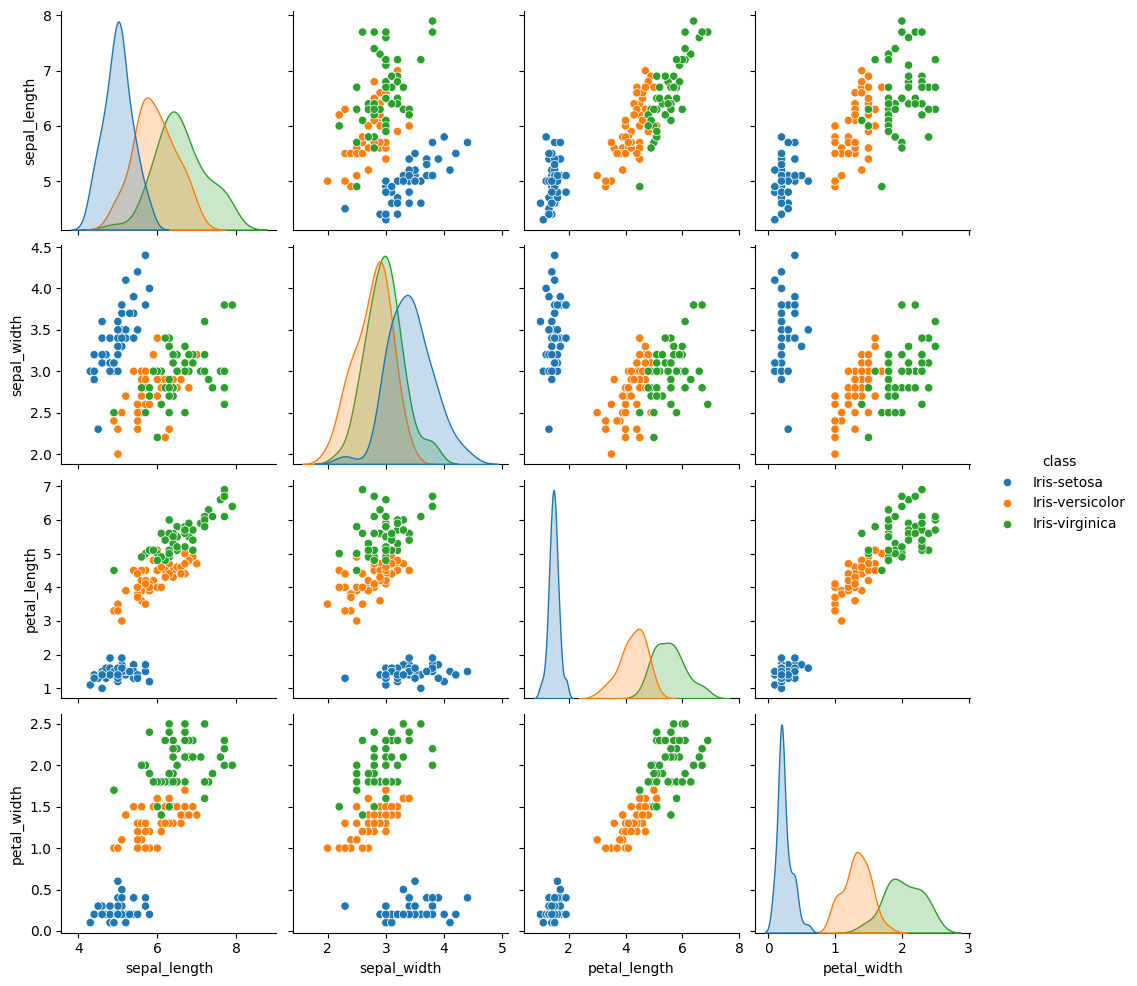

In [2]:
import seaborn as sns 


# Figure level.
sns.pairplot(data=df, hue= "class")

# 2. <a id='toc2_'></a>[Feature engineering](#toc0_)

In [3]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size= 0.2, random_state= 123)

X_train

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler


# Estimate the mean and std of the training set 
sc = StandardScaler()
sc.fit(X_train)
print(f"mean = {sc.mean_}")
print(f"var = {sc.var_}")

# Transform the training and test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

mean = [5.86916667 3.04083333 3.82083333 1.22333333]
var = [0.65529931 0.19241597 2.96398264 0.54678889]


In [27]:
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 

ppn = Perceptron(eta0= 0.05, random_state= 123)
ppn.fit(X_train_std, y_train)
# ppn.n_jobs
y_pred = ppn.predict(X_test_std)

accuracy_score(y_test, y_pred)

0.9

# 3. <a id='toc3_'></a>[Supervised learning](#toc0_)

## 3.1. <a id='toc3_1_'></a>[Classification](#toc0_)

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 


lr = LogisticRegression(penalty= "l2", C= 0.1, random_state= 123)
lr.fit(X_train_std, y_train)
accuracy_score(y_test, lr.predict(X_test_std))

0.9666666666666667

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 


svm = SVC(kernel="linear", C= 1.0, random_state= 123)
svm.fit(X_train_std, y_train)
accuracy_score(y_test, svm.predict(X_test_std))

0.9333333333333333

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 


tree = DecisionTreeClassifier(criterion= "gini", max_depth= 4, random_state= 123)
tree.fit(X_train_std, y_train)
accuracy_score(y_test, tree.predict(X_test_std))

0.9333333333333333

In [45]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 


forest = RandomForestClassifier(criterion= "gini", n_estimators= 25, random_state= 123,  n_jobs= 2)
forest.fit(X_train_std, y_train)
accuracy_score(y_test, forest.predict(X_test_std))

0.9333333333333333

In [56]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 


knn = KNeighborsClassifier(n_neighbors= 5, p= 3, metric= "minkowski")
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test_std))

/home/zhao/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.43333333333333335

# 4. <a id='toc4_'></a>[Unsupervised learning](#toc0_)

## 4.1. <a id='toc4_1_'></a>[Clustering](#toc0_)

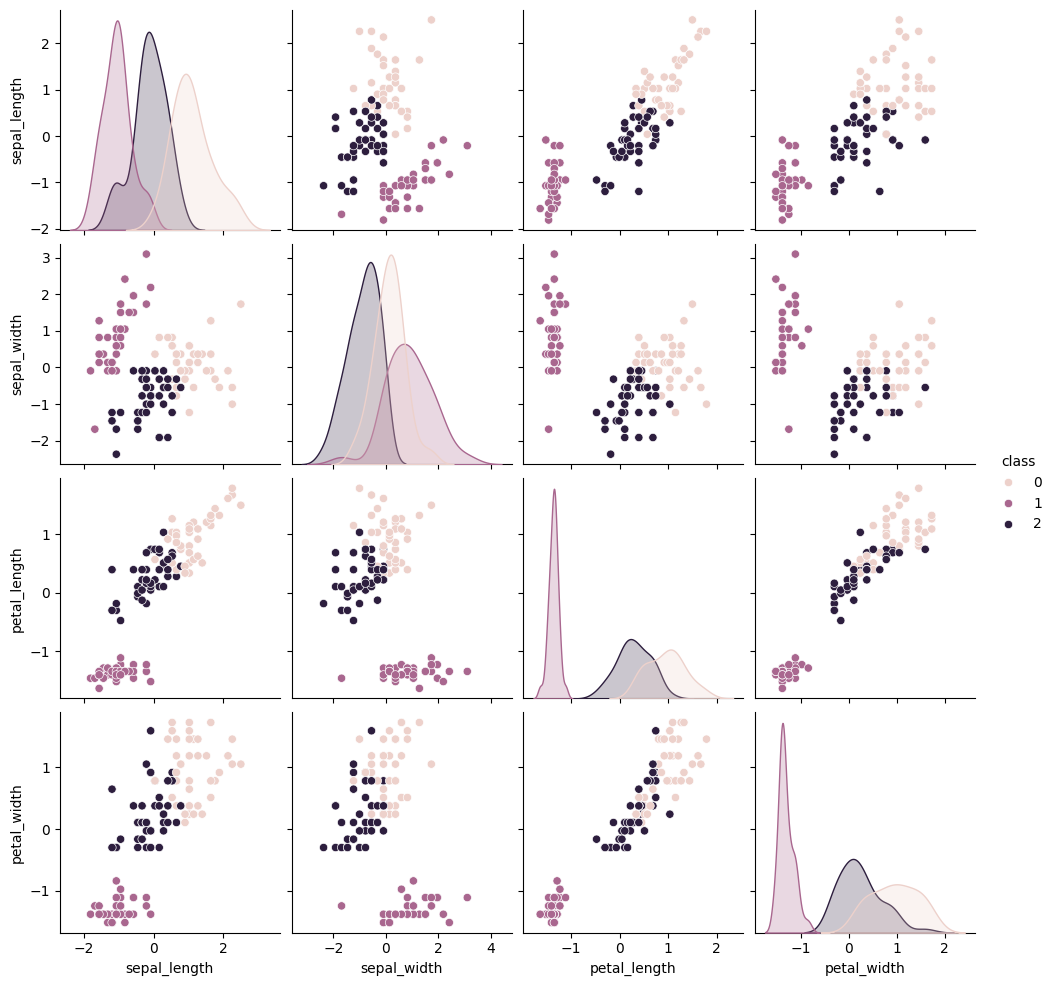

In [106]:
from sklearn.cluster import KMeans 


km = KMeans(n_clusters= 3, init= "random", n_init= 10, max_iter= 300, tol= 1e-04, random_state= 123)
km.fit(X_train_std)
X_train_std_km = km.predict(X_train_std)

X_train_std_km_df = pd.DataFrame(data= X_train_std, columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X_train_std_km_df['class'] = X_train_std_km 

sns.pairplot(data= X_train_std_km_df, hue= "class")

## 4.2. <a id='toc4_2_'></a>[Dedimensionalization](#toc0_)

<Axes: xlabel='x', ylabel='y'>

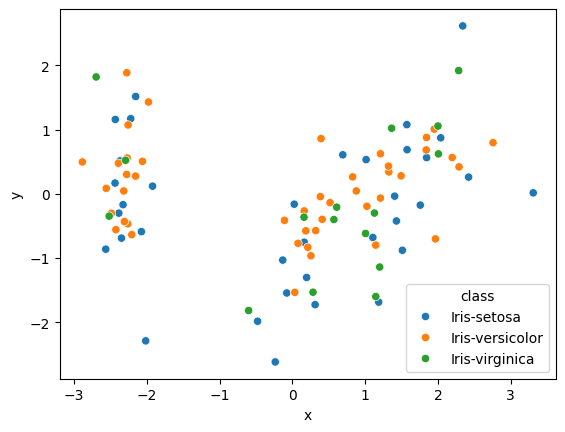

In [83]:
from sklearn.decomposition import PCA 


pca = PCA(n_components= 2)
pca.fit(X_train_std)
X_train_std_pca = pca.transform(X_train_std)

X_train_std_pca_df = pd.DataFrame(data= X_train_std_pca, columns=['x', 'y'])
X_train_std_pca_df['class'] = y_train

X_train_std_pca_df
sns.scatterplot(data= X_train_std_pca_df, x= 'x', y= 'y', hue= "class")

<Axes: xlabel='x', ylabel='y'>

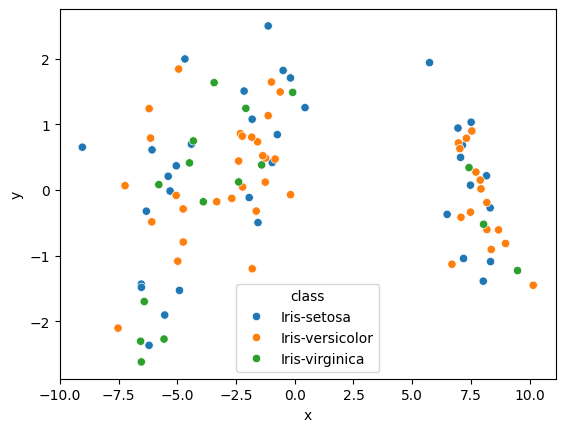

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 


lda = LDA(n_components= 2)
lda.fit(X_train_std, y_train)
X_train_std_lda = lda.transform(X_train_std)
X_train_std_lda_df = pd.DataFrame(data= X_train_std_lda, columns= ["x", "y"])
X_train_std_lda_df['class'] = y_train
sns.scatterplot(data= X_train_std_lda_df, x= 'x', y= 'y', hue= "class")